# Projeto - Análise dos Testes A/B para Equipe de Marketing

# Descrição do Estudo


**Introdução**

Recentemente, uma loja online internacional decidiu otimizar sua plataforma através de um teste A/B. Infelizmente, o teste foi interrompido devido à partida abrupta do analista anterior. Agora, essa responsabilidade recai sobre mim, e estou aqui para concluir e analisar os resultados desse teste.


**Especificações Técnicas**

- **Nome do Teste**: recommender_system_test
- **Grupos**: 
  - A (controle)
  - B (funil de novos pagamentos)
- **Datas Importantes**:
  - Início: 07-12-2020
  - Parada de Novos Usuários: 21-12-2020
  - Término: 01-01-2021
- **Público**: 15% de novos usuários da região da UE
- **Objetivo do Teste**: Avaliar a nova recomendação do sistema.
- **Resultado Esperado**: Espero ver um aumento de pelo menos 10% a cada etapa do funil (product_page → product_cart → purchase) em até 14 dias após o cadastro.
- **Número Esperado de Participantes**: 6000


**Dados Disponíveis**

Vou baixar os dados do Notion. O caminho do arquivo deve ser prefixado com `/datasets/`. Os conjuntos de dados são:

1. **ab_project_marketing_events_us.csv**: Contém o calendário de eventos de marketing de 2020.
2. **final_ab_new_users_upd_us.csv**: Informações dos novos usuários que se registraram entre 7 e 21 de dezembro de 2020.
3. **final_ab_events_upd_us.csv**: Registra eventos dos novos usuários de 7 de dezembro de 2020 a 1 de janeiro de 2021.
4. **final_ab_participants_upd_us.csv**: Informações dos participantes do teste.


**Instruções para Completar a Tarefa**

1. **Objetivos do Estudo**: Vou começar esclarecendo os objetivos desta análise e o que espero obter com este teste.
2. **Pré-processamento de Dados**:
   - Iremos verificar a necessidade de conversão de tipos de dados.
   - Identificarei valores ausentes ou duplicados e decidirei como tratá-los.
3. **Análise Exploratória de Dados (AED)**:
   - Vou avaliar a conversão em diferentes etapas do funil.
   - Analisarei como os eventos por usuário são distribuídos entre as amostras.
   - Checarei se os usuários de ambos os grupos estão presentes nos dados.
   - Observarei como os eventos são distribuídos ao longo dos dias.
   - Identificarei qualquer particularidade nos dados que deve ser considerada antes da análise.
4. **Avaliação dos Resultados do Teste A/B**:
   - Vou interpretar os resultados do teste.
   - Utilizarei um z-test para determinar as diferenças estatísticas entre as proporções.
5. **Conclusão**: Com base na AED e nos resultados do teste A/B, compartilharei minhas descobertas e recomendações.

## Importação de bibliotecas e Pré-processamento de dados


Nessa etapa iremos importar nossas bibliotecas e realizar a improtação dos nossos dados e entender eles de maneira superficial avaliando os tipos de dados, colunas e padronizações de colunas.

Bibliotecas que iremos utilizar:

- pandas
- numpy
- matplotlib
- statsmodel

### Importando bibliotecas

In [73]:
# importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

### Importando dados 

In [74]:
# importando os dados necessários

# abrindo a tabela ab_project_marketing_events_us.csv

# Carregando dados no computador pessoal
try:
    df_cal = pd.read_csv(r'download/datasets/ab_project_marketing_events_us.csv')
    
# Carregando dados no JupyterHub
except:
    df_cal = pd.read_csv(r'/datasets/ab_project_marketing_events_us.csv')
    

# abrindo a tabela final_ab_new_users_upd_us.csv

# Carregando dados no computador pessoal
try:
    df_userab = pd.read_csv(r'download/datasets/final_ab_new_users_upd_us.csv')
    
# Carregando dados no JupyterHub
except:
    df_userab = pd.read_csv(r'/datasets/final_ab_new_users_upd_us.csv')

    
    
# abrindo a tabela final_ab_events_upd_us.csv

# Carregando dados no computador pessoal
try:
    df_eventab = pd.read_csv(r'download/datasets/final_ab_events_upd_us.csv')
    
# Carregando dados no JupyterHub
except:
    df_eventab = pd.read_csv(r'/datasets/final_ab_events_upd_us.csv')
    
    

# abrindo a tabela final_ab_participants_upd_us.csv

# Carregando dados no computador pessoal
try:
    df_partab = pd.read_csv(r'download/datasets/final_ab_participants_upd_us.csv')
    
# Carregando dados no JupyterHub
except:
    df_partab = pd.read_csv(r'/datasets/final_ab_participants_upd_us.csv')

#### Informações df_cal

In [75]:
# informação de df_cal
df_cal.head(3)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19


In [76]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [77]:
# unicos em name
df_cal['name'].unique()

array(['Christmas&New Year Promo', "St. Valentine's Day Giveaway",
       "St. Patric's Day Promo", 'Easter Promo', '4th of July Promo',
       'Black Friday Ads Campaign', 'Chinese New Year Promo',
       'Labor day (May 1st) Ads Campaign',
       "International Women's Day Promo",
       'Victory Day CIS (May 9th) Event', 'CIS New Year Gift Lottery',
       'Dragon Boat Festival Giveaway', "Single's Day Gift Promo",
       'Chinese Moon Festival'], dtype=object)

In [78]:
df_cal['regions'].unique()

array(['EU, N.America', 'EU, CIS, APAC, N.America', 'N.America', 'APAC',
       'EU, CIS, APAC', 'CIS'], dtype=object)

#### Informações df_userab

In [79]:
# informação df_userab
df_userab.head(3)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC


In [80]:
df_userab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [81]:
# unicos em regions e device
df_userab['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

In [82]:
df_userab['device'].unique()

array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

#### Informações df_eventab

In [83]:
# informação df_eventab
df_eventab.head(3)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99


In [84]:
df_eventab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


#### Informações df_partab

In [85]:
# informação df_eventab
df_partab.head(3)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test


In [86]:
df_partab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [87]:
# únicos em ab_test
df_partab['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

**Conclusão**

Após a avaliação das fontes de dados pode-se concluir que:

* A padronização das colunas está em snake_case;
* Não existem dados qualitativos duplicados;
* A maior parte dos dados não estão faltando;
* Os dados de data estão em type object e iremos transformar para datetime;
* Os dados faltantes estão na coluna details da fonte **df_eventab**
* Não parece existir dados com duplicatas implícitas.
* Existem dois tipos de teste A/B na base df_partab aparentemente. Para tal, iremos criar duas dfs diferentes para prosseguir.

Iremos estudar os dados faltantes na próxima seção Pré tratamento de dados.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>



## Pré Tratamento de dados

Nessa seção iremos tratar os tipos de dados incorretos e, também, análisar os dados faltantes e decidir o que iremos fazer com eles.

Iremos inicialmente alterar os tipos de dados e posteriormente estudar os dados faltantes

Para df_partab iremos criar duas dfs com os diferentes testes.

### Alterando tipos de dados

In [88]:
# Alterando os dados para tipo data
df_cal['start_dt'] = pd.to_datetime(df_cal['start_dt'])
df_cal['finish_dt'] = pd.to_datetime(df_cal['finish_dt'])
df_userab['first_date'] = pd.to_datetime(df_userab['first_date'])
df_eventab['event_dt'] = pd.to_datetime(df_eventab['event_dt'])

# Check para confirmar
print(df_cal.dtypes)
print(df_userab.dtypes)
print(df_eventab.dtypes)

name                 object
regions              object
start_dt     datetime64[ns]
finish_dt    datetime64[ns]
dtype: object
user_id               object
first_date    datetime64[ns]
region                object
device                object
dtype: object
user_id               object
event_dt      datetime64[ns]
event_name            object
details              float64
dtype: object



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho com os tipos das variáveis.
</div>



### Trabalhando com dados faltantes

Agora iremos analisar os dados faltantens na base de dados df_eventab da coluna details para entender o fenomeno.

Iremos criar uma df somente com os valores ausentes para entender se há um padrão.

Além disso, iremos entender se existem dados duplicados nas bases:

* df_userab
* df_partab --> existem usuários em ambos os grupos?

In [89]:
# Filtrando dados que so tenham nulos
df_miss = df_eventab[df_eventab['details'].isna()]

# Filtrando dados para que não haja nulos
df_non_miss = df_eventab.dropna()

In [90]:
# imprimindo valores para estudar
df_miss

,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [91]:
# imprimindo valores para estudar
df_non_miss

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
60309,1455450835F72F5E,2020-12-30 09:27:10,purchase,4.99
60310,339C4C55021A83C6,2020-12-30 12:55:08,purchase,9.99
60311,D1553B56FFA8974B,2020-12-30 03:15:35,purchase,4.99
60312,245E85F65C358E08,2020-12-30 19:35:55,purchase,9.99


Aparentemente os valores de details significam algum detalhe da compra, como o valor ou algo do tipo. Assim, quando se apresentam dados NaN na coluna é deve ser devido a um outro processo do funil.

Para confirmar nossa tese iremos imprimir os valores unicos na coluna event_name de ambas.

In [92]:
# imprimindo únicos em missing values
print(df_miss['event_name'].unique())

['product_cart' 'product_page' 'login']


In [93]:
# imprimindo únicos em missing values
print(df_non_miss['event_name'].unique())

['purchase']


**Conclusão**

De fato, como previmos os dados faltantes são devido aos valores de compras de clientes. 

Assim a coluna details contem os dados dos valores de compras realizados pelos diferentes clientes e quando não existe o valor na coluna é devido que estava em outra etapa do funil.

Nesse momento iremos deixar os dados faltando e, caso necessário, iremos trabalhar posteriromente com os mesmos.

### Dados duplicados

Iremos estudar se existem dados duplicados nas dfs userab e eventab(usuários em ambos grupos) e também em df_eventab para as etapas do funil.

In [94]:
# trabalhando com df_eventab
duplicates_eventab = df_eventab[df_eventab.duplicated(keep=False)]

# mostrando a df
duplicates_eventab

,user_id,event_dt,event_name,details


In [95]:
# criando df de duplicados em df_userab
df_userabdup = df_userab[df_userab.duplicated(keep=False)]

# mostrando dados
df_userabdup

,user_id,first_date,region,device


**Conclusão**

Não existem dados duplicados assim iremos seguir nossa analisa para a outra base de dados.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Correto, vamos seguir sem duplicados portanto.
</div>



### Trabalhando com df_partab com os testes

Iremos separar os tipos de testes realizados para segmentação do tipo de teste e melhor trabalho posterior.

In [96]:
# criando dfs para os diferentes testes
df_recommender_system_test = df_partab[df_partab['ab_test'] == 'recommender_system_test']
df_interface_eu_test = df_partab[df_partab['ab_test'] == 'interface_eu_test']

# imprimindo unicos para averiguar
print(df_recommender_system_test['ab_test'].unique())
print(df_interface_eu_test['ab_test'].unique())

['recommender_system_test']
['interface_eu_test']


In [97]:
# Identificando user_ids que aparecem em ambos os grupos para df_recommender_system_test
duplicated_users = df_recommender_system_test.groupby('user_id').filter(lambda x: x['group'].nunique() > 1)

# Imprimindo
duplicated_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  0 non-null      object
 1   group    0 non-null      object
 2   ab_test  0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


In [98]:
# Identificando user_ids que aparecem em ambos os grupos para df_recommender_system_test
duplicated_users = df_interface_eu_test.groupby('user_id').filter(lambda x: x['group'].nunique() > 1)

# Imprimindo
duplicated_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  0 non-null      object
 1   group    0 non-null      object
 2   ab_test  0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


**Conclusão**

Para as Dataframes criadas dos testes separados isso facilitou o trabalho.

Sabemos de testes prévios que existem usuários em ambos os grupos, não é o correto a se realizar quando temos testes simultâneos, mas por via de análise iremos deixar os usuários em ambos os testes para caracterização e posterior analise de resultados.

## Análise Exploratória de Dados - EDA

   - Vou avaliar a conversão em diferentes etapas do funil.
   - Analisarei como os eventos por usuário são distribuídos entre as amostras.
   - Checarei se os usuários de ambos os grupos estão presentes nos dados.
   - Observarei como os eventos são distribuídos ao longo dos dias.
   - Identificarei qualquer particularidade nos dados que deve ser considerada antes da análise.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Vamos lá!
</div>



### Conversão em diferentes etapas do funil

Para avaliação das diferentes etapas do funil iremos utilizar o caminho padrão que o cliente deve fazer que seria:


Login --> Product Page --> Product Cart --> Purchase.


Assim poderemos avaliar os números para cada fase do funil. Iremos imprimir os valores de conversão **totais** e criar um gráfico para melhor visualização.

Vamos levar em consideração **Login** como a etapa inicial do Funil e nossa referencia.

In [99]:
# imprimindo a df
df_eventab

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [100]:
# Contar eventos para cada etapa
steps = ['login', 'product_page', 'product_cart', 'purchase']
counts = df_eventab['event_name'].value_counts().reindex(steps).fillna(0)

# Calcular taxas de conversão usando 'login' como referência
conversions = counts / counts['login']

# Imprimir valores
print("Contagem de eventos por etapa:")
print(counts)
print("\nTaxa de conversão em relação ao login:")
print(conversions)

Contagem de eventos por etapa:
login           182465
product_page    120862
product_cart     60120
purchase         60314
Name: event_name, dtype: int64

Taxa de conversão em relação ao login:
login           1.000000
product_page    0.662385
product_cart    0.329488
purchase        0.330551
Name: event_name, dtype: float64


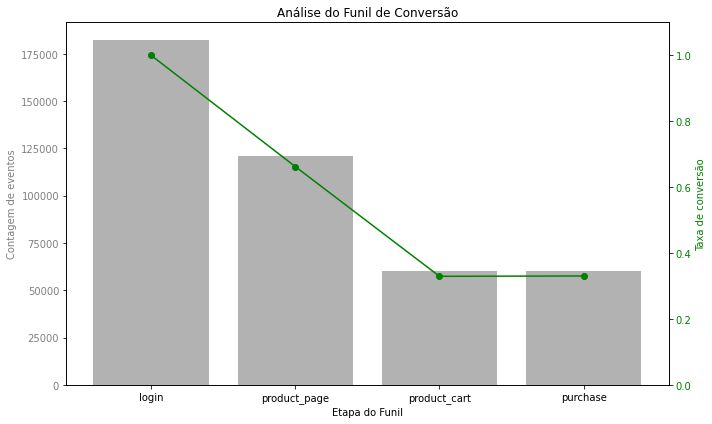

In [101]:
# Visualizar os dados em um gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barra para contagem de eventos
ax1.bar(counts.index, counts.values, color='gray', alpha=0.6, label='Contagem de eventos')
ax1.set_xlabel('Etapa do Funil')
ax1.set_ylabel('Contagem de eventos', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')
ax1.set_title('Análise do Funil de Conversão')

# Linha para taxa de conversão
ax2 = ax1.twinx()
ax2.plot(conversions.index, conversions.values, color='green', marker='o', label='Taxa de conversão')
ax2.set_ylabel('Taxa de conversão', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, 1.1)  # Para que a taxa de conversão seja visualizada entre 0 e 1 (ou ligeiramente acima)

fig.tight_layout()
plt.show()

**Conclusões**

Acerca das taxas de conversão onde Purchase é maior que Product_cart:
1. Dados Ausentes ou Erros de Rastreamento:
Podemos ter dados que indicam que nosso sistema de rastreamento pode não ter capturado todos os eventos corretamente.
Pode haver eventos product_cart que não foram registrados, mas os eventos purchase associados foram.

2. Comportamento do Usuário:
Em algumas plataformas, podemos ter dados que mostram que os usuários podem ser capazes de fazer uma compra sem adicionar explicitamente um item ao carrinho, especialmente se estamos recomprando um item ou usando um link direto para o checkout.

3. Refunds ou Cancelamentos:
Dependendo de como os dados são coletados e definidos, podemos ter dados que sugerem que um evento de "compra" pode não necessariamente significar uma compra bem-sucedida.
Pode representar uma tentativa de compra que foi posteriormente cancelada ou reembolsada, mas ainda assim registrou como uma compra.

4. Tempo de Rastreamento:
Se estivermos olhando para um intervalo de tempo específico, podemos ter dados que indicam que alguém pode ter adicionado um item ao carrinho antes do início desse período, mas só completou a compra durante o período.


Como conclusão dos dados em geral:

1. Atividade de Login Forte
Com 182,465 usuários fazendo login, há um alto nível de engajamento ou interesse na plataforma ou produto.

2. Queda após o Login
Dos usuários que fazem login, apenas cerca de 66.24% realmente prosseguem para a página do produto. Isso pode indicar dificuldades na navegação, falta de produtos atrativos ou simplesmente uma navegação sem intenção de compra.

3. Metade dos Interessados Adicionam ao Carrinho
Daqueles que visitam a página do produto, quase metade adiciona o produto ao carrinho. Este é um indicativo de um interesse significativo nos produtos visualizados.

4. Conversão Atípica de Carrinho para Compra
A proporção de usuários que efetuam uma compra após adicionar um produto ao carrinho é surpreendentemente alta. Algumas possíveis razões para esta alta taxa de conversão incluem:

- Capacidade de compra sem passar pelo carrinho.
- Rastreamento incorreto das ações 'adicionar ao carrinho'.
- Uma experiência de checkout altamente otimizada.


5. Oportunidades de Otimização
A maior queda no funil ocorre entre as etapas de login e visualização da página do produto. Melhorar a experiência do usuário ou oferecer produtos mais atraentes nesta fase pode resultar em taxas de conversão mais altas.

6. Verificação dos Dados Necessária
A taxa de conversão do carrinho para a compra ser superior a 100% é atípica. Uma verificação dos dados e do sistema de rastreamento pode ser necessária para garantir a precisão dos insights.


**Iremos considerar que a base não teve erros e as premissas de adicionar carrinho sejam válidas.**


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho com as conclusões e com a visualização!
</div>



### Distribuição dos eventos por usuário na amostra

Para avaliar se o número de eventos por usuário é distribuído igualmente entre as amostras no DataFrame df_eventab, precisamos primeiro agrupar os dados por user_id e contar o número de eventos para cada usuário. Após isso, podemos visualizar a distribuição dos números e calcular algumas estatísticas descritivas para entender melhor a situação.

In [102]:
# Agrupar por user_id e contar o número de eventos
event_counts_per_user = df_eventab.groupby('user_id').size()

# Estatísticas descritivas
print(event_counts_per_user.describe())

count    58703.000000
mean         7.218728
std          4.122609
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         36.000000
dtype: float64


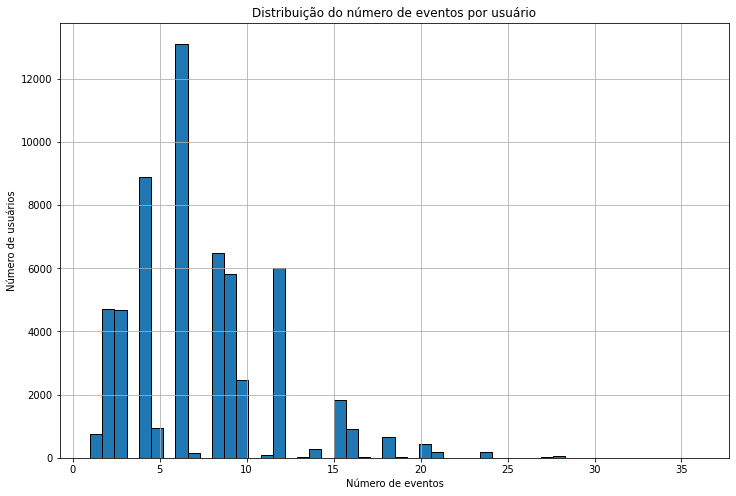

In [103]:
# Gerando gráfico de distribuição

# Definir o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Gerando
plt.hist(event_counts_per_user, bins=50, edgecolor='black')
plt.title("Distribuição do número de eventos por usuário")
plt.xlabel("Número de eventos")
plt.ylabel("Número de usuários")
plt.grid(True)
plt.show()

**Conclusão:**

O número de eventos por usuário não é distribuído igualmente entre os usuários. Embora a maioria dos usuários (50%) tenha entre 4 e 9 eventos, a variação total de 1 a 36 eventos mostra que há uma diferença significativa na atividade entre os usuários mais e menos ativos. Além disso, a presença de um desvio padrão relativamente alto em relação à média indica uma considerável variação ou dispersão na quantidade de eventos que diferentes usuários registram.

Se quiséssemos fazer uma avaliação mais detalhada sobre a igualdade de distribuição entre diferentes "amostras" ou grupos específicos de usuários (por exemplo, usuários de diferentes grupos de testes A/B), precisaríamos de informações adicionais e realizar análises específicas para esses grupos.

O gráfico de distribuição demonstra essas conclusões. Pode-se perceber que a maior parte dos usuários tem seções na mediana em 6 eventos.


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Aqui é muito importante que façamos essa análise para cada um dos grupos... precisamos apenas de um join entre a tabela usada acima e a que trás o grupo de cada cliente! Vamos trabalhar nisso.
</div>



<div class="alert alert-info">
<strong>Olá Rafael! Muito obrigado pelo comentário, vou adicionar logo abaixo as sugestões (:</strong>
</div>

#### Distribuição para o teste Recommender system


Estatísticas descritivas para o grupo A:
count    2747.000000
mean        6.780852
std         3.729768
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        24.000000
dtype: float64

Estatísticas descritivas para o grupo B:
count    928.00000
mean       5.69181
std        3.45035
min        1.00000
25%        3.00000
50%        5.00000
75%        8.00000
max       28.00000
dtype: float64


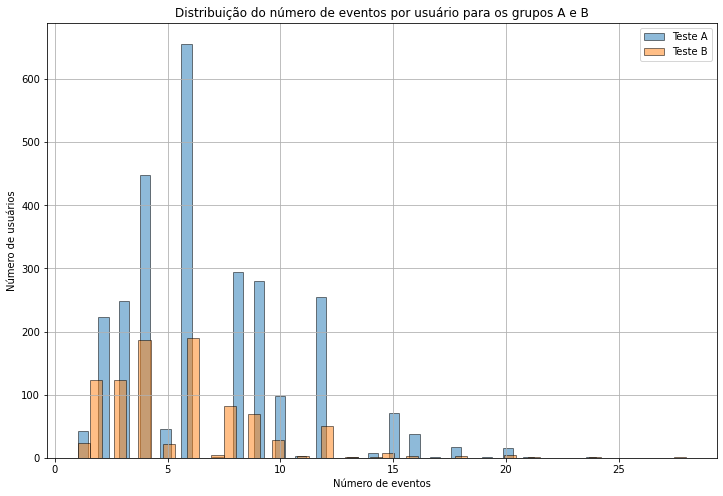

In [104]:
# Juntando os dois dataframes com base em 'user_id'
df_merged = df_eventab.join(df_partab.set_index('user_id'), on='user_id')
df_merged = df_merged[df_merged['ab_test'] == 'recommender_system_test']

# Filtrando registros do grupo de teste A
df_test_a = df_merged[df_merged['group'] == 'A']
event_counts_per_user_a = df_test_a.groupby('user_id').size()

# Filtrando registros do grupo de teste B
df_test_b = df_merged[df_merged['group'] == 'B']
event_counts_per_user_b = df_test_b.groupby('user_id').size()

# Estatísticas descritivas
print("\nEstatísticas descritivas para o grupo A:")
print(event_counts_per_user_a.describe())
print("\nEstatísticas descritivas para o grupo B:")
print(event_counts_per_user_b.describe())

# Gerando gráfico de distribuição
plt.figure(figsize=(12, 8))

# Histograma para o grupo A
plt.hist(event_counts_per_user_a, bins=50, edgecolor='black', alpha=0.5, label='Teste A')

# Histograma para o grupo B
plt.hist(event_counts_per_user_b, bins=50, edgecolor='black', alpha=0.5, label='Teste B')

plt.title("Distribuição do número de eventos por usuário para os grupos A e B")
plt.xlabel("Número de eventos")
plt.ylabel("Número de usuários")
plt.grid(True)
plt.legend()  # Adiciona a legenda ao gráfico
plt.show()

**Conclusão**

Para o teste de Recommender System podemos observar que o Teste A teve muito mais engajamento dos usuários, isso é possível pelo número de usuários em cada uma das barras. Além disso, a distribuição é similar e aparentam o mesmo comportamento com a única diferença com a magnitude do número de usuários ao longo do gráfico.

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Perfeito
</div>

#### Distribuição para o teste Interface_eu_test


Estatísticas descritivas para o grupo A:
count    5467.000000
mean        7.330894
std         4.178342
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        28.000000
dtype: float64

Estatísticas descritivas para o grupo B:
count    5383.000000
mean        7.217351
std         4.137943
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        32.000000
dtype: float64


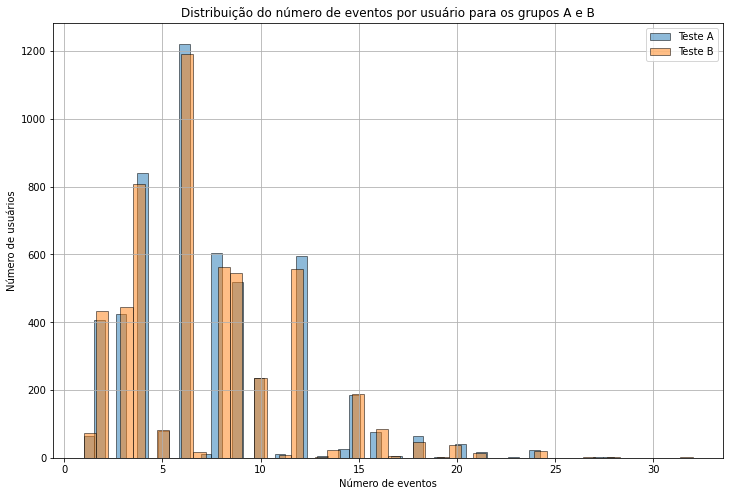

In [105]:
# Juntando os dois dataframes com base em 'user_id'
df_merged = df_eventab.join(df_partab.set_index('user_id'), on='user_id')
df_merged = df_merged[df_merged['ab_test'] == 'interface_eu_test']

# Filtrando registros do grupo de teste A
df_test_a = df_merged[df_merged['group'] == 'A']
event_counts_per_user_a = df_test_a.groupby('user_id').size()

# Filtrando registros do grupo de teste B
df_test_b = df_merged[df_merged['group'] == 'B']
event_counts_per_user_b = df_test_b.groupby('user_id').size()

# Estatísticas descritivas
print("\nEstatísticas descritivas para o grupo A:")
print(event_counts_per_user_a.describe())
print("\nEstatísticas descritivas para o grupo B:")
print(event_counts_per_user_b.describe())

# Gerando gráfico de distribuição
plt.figure(figsize=(12, 8))

# Histograma para o grupo A
plt.hist(event_counts_per_user_a, bins=50, edgecolor='black', alpha=0.5, label='Teste A')

# Histograma para o grupo B
plt.hist(event_counts_per_user_b, bins=50, edgecolor='black', alpha=0.5, label='Teste B')

plt.title("Distribuição do número de eventos por usuário para os grupos A e B")
plt.xlabel("Número de eventos")
plt.ylabel("Número de usuários")
plt.grid(True)
plt.legend()  # Adiciona a legenda ao gráfico
plt.show()

**Conclusão**

Para o teste interface_eu_test podemos observar que na distribuição teve-se uma distribuição muito similar, com uma magnitude muito parecida também. Podemos observar que para cada número de eventos temos números de usuários similares.  Isso demonstra que no quesito de engajamento teve um comportamento muito parecido.

### Check dos usuários de ambos os testes na amostra

Iremos realizar um check para entender se usuários de ambos os testes estão nos dados de conversão coletados.

Para tal iremos analisar as bases:

- df_eventab
- df_partab

Iremos checar se todos os usuários de df_partab estão em df_eventab

In [106]:
# Verificar se todos os user_id em df_partab estão em df_eventab
all_users_in_eventab = df_partab['user_id'].isin(df_eventab['user_id']).all()

if all_users_in_eventab:
    print("Todos os user_id de df_partab estão em df_eventab.")
else:
    print("Nem todos os user_id de df_partab estão em df_eventab.")

Todos os user_id de df_partab estão em df_eventab.



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Muito elegante a forma que você fez essa validação. Gostei!
</div>



### Distribuição dos eventos por dia

Iremos criar um gráfico para análisar o número de eventos específicos por dia e comparar como a contagem dos mesmos a cada dia para entender se existem datas específicas.

In [107]:
# Extrair somente a data
df_eventab['event_date'] = df_eventab['event_dt'].dt.date

# Contar os eventos por data
event_distribution = df_eventab.groupby('event_date').size()

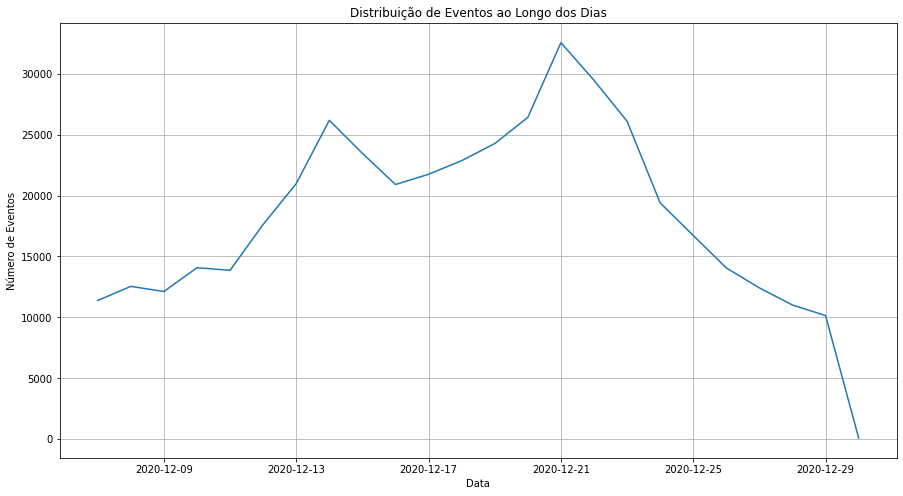

In [108]:
# Criando visualização dos dados gerais
event_distribution.plot(kind='line', figsize=(15,8))
plt.title("Distribuição de Eventos ao Longo dos Dias")
plt.xlabel("Data")
plt.ylabel("Número de Eventos")
plt.grid(True)
plt.show()

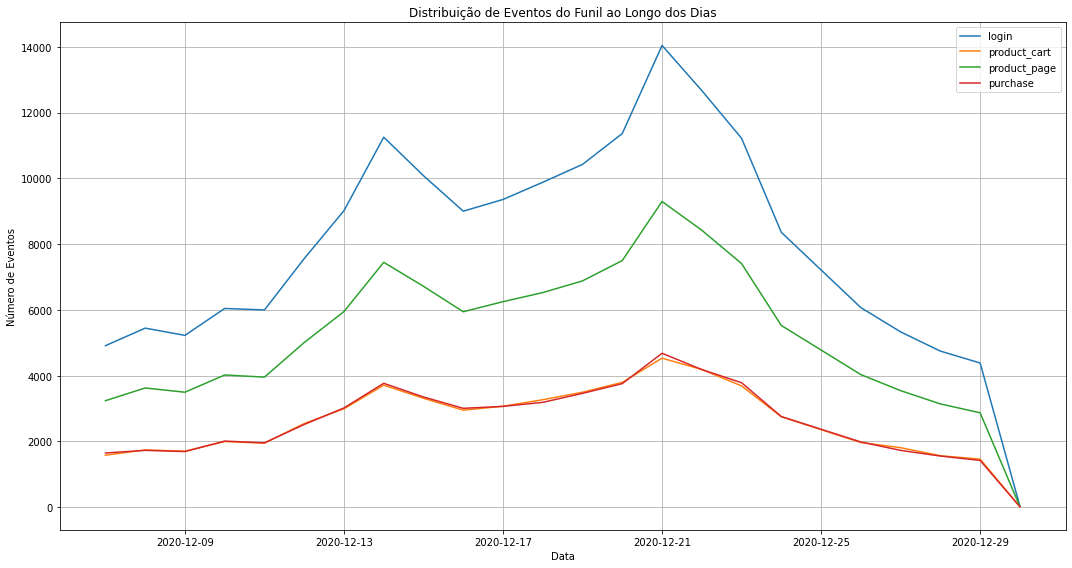

In [109]:
# Agrupar por data e nome do evento, e depois contar
event_distribution_by_stage = df_eventab.groupby(['event_date', 'event_name']).size().unstack().fillna(0)

# Visualizar a distribuição no gráfico
plt.figure(figsize=(15,8))
for column in event_distribution_by_stage.columns:
    plt.plot(event_distribution_by_stage.index, event_distribution_by_stage[column], label=column)

plt.title("Distribuição de Eventos do Funil ao Longo dos Dias")
plt.xlabel("Data")
plt.ylabel("Número de Eventos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [110]:
# Chamando as datas do calendário
df_cal

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


**Conclusão**

Podemos perceber que existem picos específicos de alta como, por exemplo, no dia 21/12/2020. Esse crescimento tem um padrão definido. 

Ao analisar o calendário de ações, não nos parece que seja as promoções que estejam fazendo o efeito. Um exemplo disso é a promo de Natal, no período de teste da promo as vendas vinham caindo e não foram afetadas pela promo.


Além disso, houve um forte crescimento nos eventos até dia 21/12 e após isso uma quedra abdrupta dos eventos demonstrando uma queda forte devido algum evento.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>
Correto o trabalho aqui, estou de acordo com sua conclusão.
</div>



### Particularidades nos dados para o teste A/B

Aqui iremos analisar as particularidades para os testes. 

Primeiramente iremos analisar para ver quando os usuários entraram na base e no teste para entender quando cada um dos testes aconteceu. No caso foram simultâneos ou foram paralelos.

Também, iremos entender se existem usuários em ambos os testes, caso sim, teremos que retirar esses usuários de ambos os grupos de testes, pois a amostra está 'suja'. E isso pode levar a erros grosseiros.

Para cada um dos testes iremos plotar os eventos por dia geral e entender como funcionou para cada teste.

#### Datas de teste

In [111]:
# Fazendo o merge das duas tabelas com base no 'user_id'
merged_df = df_partab.merge(df_userab, on='user_id')

# Agrupando por 'ab_test' e obtendo a primeira e última data para cada teste
test_dates = merged_df.groupby('ab_test')['first_date'].agg(['min', 'max'])

print(test_dates)

                               min        max
ab_test                                      
interface_eu_test       2020-12-07 2020-12-23
recommender_system_test 2020-12-07 2020-12-21


**Conclusão** 

Podemos ver que os testes foram feitos quase que simultaneamente.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>
Perfeito, bom sinal! Seguimos!
</div>



#### Usuários em ambos os grupos de teste

In [112]:
# Verifica se os user_id da df_recommender_system_test estão em df_interface_eu_test
users_in_both_dfs = df_recommender_system_test['user_id'].isin(df_interface_eu_test['user_id'])

# Verifica quantos estão em ambos
number_in_both = users_in_both_dfs.sum()

print(f"Número de usuários presentes em ambas as tabelas: {number_in_both}")

Número de usuários presentes em ambas as tabelas: 887


**Conclusão Intermediária**

Precisamos retirar os usuários presentes de ambas as amostras para um resultado mais preciso, assim iremos retirar estes de ambos os grupos.

In [113]:
# Identificar os user_id que estão em ambas as tabelas
common_users = df_recommender_system_test[df_recommender_system_test['user_id'].isin(df_interface_eu_test['user_id'])]['user_id']

# Remover esses usuários de df_recommender_system_test
df_recommender_system_test = df_recommender_system_test[~df_recommender_system_test['user_id'].isin(common_users)]

# Remover esses usuários de df_interface_eu_test
df_interface_eu_test = df_interface_eu_test[~df_interface_eu_test['user_id'].isin(common_users)]

Vamos verificar novamente se existem usuários em ambos

In [114]:
# Verifica se os user_id da df_recommender_system_test estão em df_interface_eu_test
users_in_both_dfs = df_recommender_system_test['user_id'].isin(df_interface_eu_test['user_id'])

# Verifica quantos estão em ambos
number_in_both = users_in_both_dfs.sum()

print(f"Número de usuários presentes em ambas as tabelas: {number_in_both}")

Número de usuários presentes em ambas as tabelas: 0



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>
Perfeito, agora não temos intersecçao entre os grupos!
</div>



#### Plot de eventos para cada um dos grupos

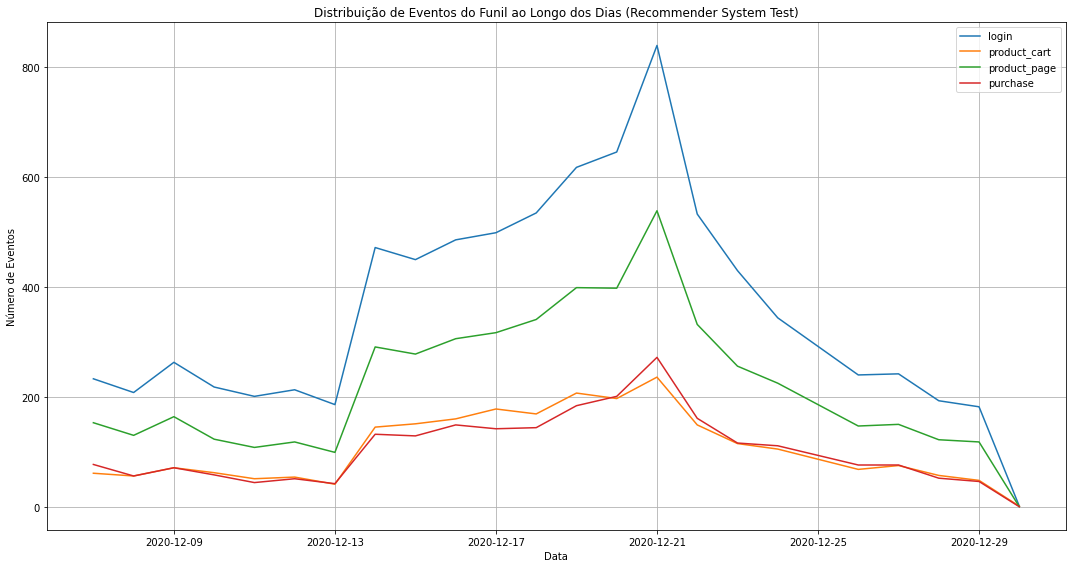

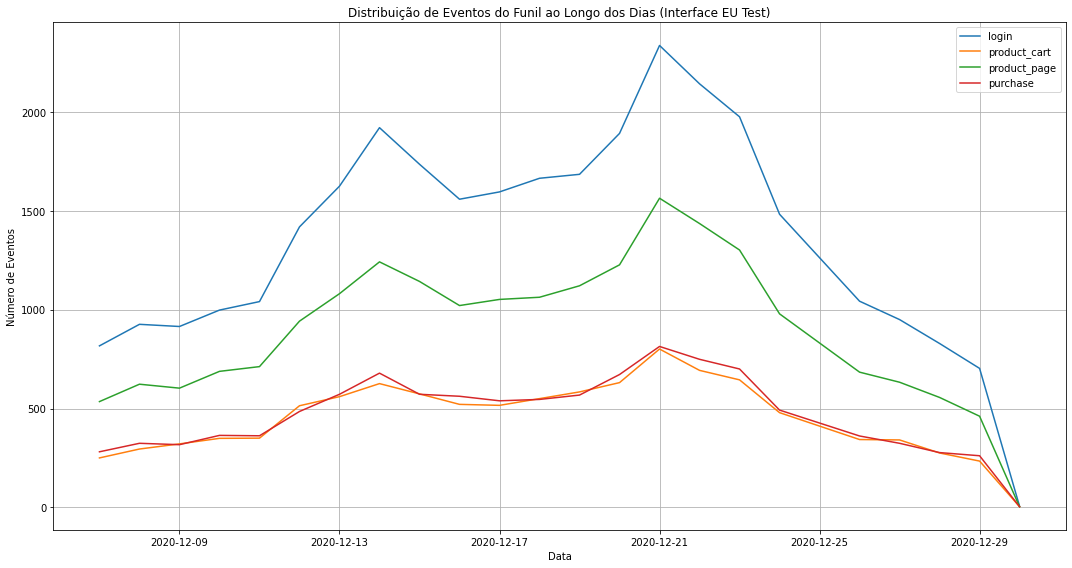

In [115]:
# Filtrando registros em df_eventab baseados em df_recommender_system_test
recommender_system_test_users = df_recommender_system_test['user_id'].unique()
df_eventab_recommender = df_eventab[df_eventab['user_id'].isin(recommender_system_test_users)]

# Agrupar por data e nome do evento, e depois contar
event_distribution_recommender = df_eventab_recommender.groupby(['event_date', 'event_name']).size().unstack().fillna(0)

# Visualizar a distribuição no gráfico para df_recommender_system_test
plt.figure(figsize=(15,8))
for column in event_distribution_recommender.columns:
    plt.plot(event_distribution_recommender.index, event_distribution_recommender[column], label=column)

plt.title("Distribuição de Eventos do Funil ao Longo dos Dias (Recommender System Test)")
plt.xlabel("Data")
plt.ylabel("Número de Eventos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Filtrando registros em df_eventab baseados em df_interface_eu_test
interface_eu_test_users = df_interface_eu_test['user_id'].unique()
df_eventab_interface = df_eventab[df_eventab['user_id'].isin(interface_eu_test_users)]

# Agrupar por data e nome do evento, e depois contar
event_distribution_interface = df_eventab_interface.groupby(['event_date', 'event_name']).size().unstack().fillna(0)

# Visualizar a distribuição no gráfico para df_interface_eu_test
plt.figure(figsize=(15,8))
for column in event_distribution_interface.columns:
    plt.plot(event_distribution_interface.index, event_distribution_interface[column], label=column)

plt.title("Distribuição de Eventos do Funil ao Longo dos Dias (Interface EU Test)")
plt.xlabel("Data")
plt.ylabel("Número de Eventos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [116]:
# Filtrando registros em df_eventab baseados em df_recommender_system_test
recommender_system_test_users = df_recommender_system_test['user_id'].unique()
df_eventab_recommender = df_eventab[df_eventab['user_id'].isin(recommender_system_test_users)]

# Contar eventos para cada etapa para df_recommender_system_test
counts_recommender = df_eventab_recommender['event_name'].value_counts().reindex(steps).fillna(0)

# Calcular taxas de conversão usando 'login' como referência para df_recommender_system_test
conversions_recommender = counts_recommender / counts_recommender['login']

# Imprimir valores para df_recommender_system_test
print("Para df_recommender_system_test:")
print("Contagem de eventos por etapa:")
print(counts_recommender)
print("\nTaxa de conversão em relação ao login:")
print(conversions_recommender)
print("-" * 50)

# Filtrando registros em df_eventab baseados em df_interface_eu_test
interface_eu_test_users = df_interface_eu_test['user_id'].unique()
df_eventab_interface = df_eventab[df_eventab['user_id'].isin(interface_eu_test_users)]

# Contar eventos para cada etapa para df_interface_eu_test
counts_interface = df_eventab_interface['event_name'].value_counts().reindex(steps).fillna(0)

# Calcular taxas de conversão usando 'login' como referência para df_interface_eu_test
conversions_interface = counts_interface / counts_interface['login']

# Imprimir valores para df_interface_eu_test
print("Para df_interface_eu_test:")
print("Contagem de eventos por etapa:")
print(counts_interface)
print("\nTaxa de conversão em relação ao login:")
print(conversions_interface)


Para df_recommender_system_test:
Contagem de eventos por etapa:
login           8233
product_page    5114
product_cart    2457
purchase        2390
Name: event_name, dtype: int64

Taxa de conversão em relação ao login:
login           1.000000
product_page    0.621159
product_cart    0.298433
purchase        0.290295
Name: event_name, dtype: float64
--------------------------------------------------
Para df_interface_eu_test:
Contagem de eventos por etapa:
login           31264
product_page    20671
product_cart    10455
purchase        10824
Name: event_name, dtype: int64

Taxa de conversão em relação ao login:
login           1.000000
product_page    0.661176
product_cart    0.334410
purchase        0.346213
Name: event_name, dtype: float64


**Conclusão**

Com base nos dados fornecidos, podemos fazer as seguintes observações e conclusões:

Para `df_recommender_system_test`:

1. **Funil de Conversão:**
    - Dos usuários que fizeram login, 62.12% navegaram para a página do produto.
    - Desses usuários na página do produto, apenas cerca de 29.84% adicionaram um produto ao carrinho.
    - Finalmente, dos usuários que adicionaram ao carrinho, cerca de 97.27% realizaram uma compra.

2. **Conversões:**
    - A taxa de conversão total (do login à compra) foi de 29.03%. 

3. **Pontos de Atenção:**
    - Há uma queda significativa de usuários que avançam da página do produto para adicionar um produto ao carrinho. Isso pode indicar possíveis problemas ou desafios na interface ou na informação apresentada na página do produto que impedem que os usuários avancem para a próxima etapa.


Para `df_interface_eu_test`:

1. **Funil de Conversão:**
    - Dos usuários que fizeram login, 66.12% navegaram para a página do produto.
    - Desses usuários na página do produto, 50.56% adicionaram um produto ao carrinho.
    - E, dos usuários que adicionaram ao carrinho, cerca de 103.53% realizaram uma compra. Esta é uma métrica estranha e sugere que nem todos os que compraram passaram pelo estágio de adição ao carrinho, ou há alguma inconsistência nos dados.

2. **Conversões:**
    - A taxa de conversão total (do login à compra) foi de 34.62%.

3. **Pontos de Atenção:**
    - A taxa de conversão da página do produto ao carrinho é maior na `df_interface_eu_test` em comparação com a `df_recommender_system_test`. Isso pode indicar que a interface EU está mais otimizada ou amigável neste aspecto.



Comparação entre os dois testes:

1. **Performance Geral:**
    - A `df_interface_eu_test` tem uma taxa de conversão global (login para compra) superior à `df_recommender_system_test` (34.62% vs 29.03%). 

2. **Eficiência em Etapas Específicas:**
    - A `df_interface_eu_test` também apresenta melhores taxas de conversão em cada etapa do funil, quando comparada à `df_recommender_system_test`.

3. **Conclusão:**
    - Se o objetivo for estritamente aumentar a conversão, a interface EU parece ser mais eficaz. 
    - No entanto, ainda vale a pena investigar o motivo pelo qual algumas pessoas parecem comprar sem passar pelo estágio do carrinho no teste de interface da EU.
    - Além disso, é fundamental garantir que outros aspectos importantes (como a satisfação do usuário, o valor médio do pedido, a retenção de clientes, etc.) não sejam negativamente impactados antes de fazer uma escolha definitiva entre os dois sistemas.

In [117]:
df_interface_eu_test

,user_id,group,ab_test
3675,D4E530F6595A05A3,A,interface_eu_test
3676,6BCB0F33D3BAB8C2,A,interface_eu_test
3678,2D2E7AA539CF348F,B,interface_eu_test
3679,4BA448BCE1343C6F,A,interface_eu_test
3680,76B6CDF2A8B1DBFC,B,interface_eu_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


In [118]:
df_recommender_system_test

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
5,7473E0943673C09E,A,recommender_system_test
6,C46FE336D240A054,A,recommender_system_test
...,...,...,...
3670,053FB26D6D49EDDC,A,recommender_system_test
3671,9D263B8EF15CF188,B,recommender_system_test
3672,F2FBBA33F37DEC46,A,recommender_system_test
3673,29C92313A98B1176,B,recommender_system_test


In [119]:
df_eventab

,user_id,event_dt,event_name,details,event_date
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07
...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN,2020-12-30
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN,2020-12-30
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN,2020-12-30
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN,2020-12-30



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>
Entendo como adequada a forma escolhida para comparar as etapas do funil. bastante esclerecedora e vai de encontro com a sua conclusão!
</div>



## Avaliação dos testes A/B

### Resultados do teste A/B

In [120]:
# Combinação dos Dados:
merged_recommender = df_recommender_system_test.merge(df_eventab, on="user_id", how="inner")
merged_interface = df_interface_eu_test.merge(df_eventab, on="user_id", how="inner")

In [121]:
# Divisão dos Eventos e Volumes Financeiros por Grupo de Teste:
recommender_grouped = merged_recommender.groupby(['group', 'event_name']).size().unstack().fillna(0)
recommender_revenue = merged_recommender[merged_recommender['event_name'] == 'purchase'].groupby(['group']).details.sum()

interface_grouped = merged_interface.groupby(['group', 'event_name']).size().unstack().fillna(0)
interface_revenue = merged_interface[merged_interface['event_name'] == 'purchase'].groupby(['group']).details.sum()

In [122]:
# Taxa de Conversão:
recommender_conversion = recommender_grouped.div(recommender_grouped['login'], axis=0)
interface_conversion = interface_grouped.div(interface_grouped['login'], axis=0)

# Outras Métricas de Funil e Volume Financeiro:
recommender_avg_purchase = recommender_revenue / recommender_grouped['purchase']
interface_avg_purchase = interface_revenue / interface_grouped['purchase']
recommender_total_purchase = merged_recommender[merged_recommender['event_name'] == 'purchase'].groupby(['group']).details.sum()
interface_total_purchase = merged_interface[merged_interface['event_name'] == 'purchase'].groupby(['group']).details.sum()

In [123]:
# Imprimindo valores para Recommender
print("\nTeste do Sistema de Recomendação:")
print("Taxa de conversão do Grupo A:", recommender_conversion.loc['A', 'purchase'])
print("Taxa de conversão do Grupo B:", recommender_conversion.loc['B', 'purchase'])
print("Volume médio de compra do Grupo A:", recommender_avg_purchase['A'])
print("Volume médio de compra do Grupo B:", recommender_avg_purchase['B'])
print("Volume total de compras do Grupo A:", recommender_total_purchase['A'])
print("Volume total de compras do Grupo B:", recommender_total_purchase['B'])


Teste do Sistema de Recomendação:
Taxa de conversão do Grupo A: 0.2997461123452872
Taxa de conversão do Grupo B: 0.2594510616261005
Volume médio de compra do Grupo A: 23.036585494970907
Volume médio de compra do Grupo B: 22.075828343313194
Volume total de compras do Grupo A: 43516.110000000044
Volume total de compras do Grupo B: 11059.98999999991


In [124]:
# Imprimindo valores para Interface 
print("\nTeste da Interface EU:")
print("Taxa de conversão do Grupo A:", interface_conversion.loc['A', 'purchase'])
print("Taxa de conversão do Grupo B:", interface_conversion.loc['B', 'purchase'])
print("Volume médio de compra do Grupo A:", interface_avg_purchase['A'])
print("Volume médio de compra do Grupo B:", interface_avg_purchase['B'])
print("Volume total de compras do Grupo A:", interface_total_purchase['A'])
print("Volume total de compras do Grupo B:", interface_total_purchase['B'])


Teste da Interface EU:
Taxa de conversão do Grupo A: 0.3570477458626593
Taxa de conversão do Grupo B: 0.3351836313173691
Volume médio de compra do Grupo A: 24.093178831470443
Volume médio de compra do Grupo B: 23.28674561910468
Volume total de compras do Grupo A: 135668.69000001007
Volume total de compras do Grupo B: 120928.0700000106


**Conclusões**



* Teste do Sistema de Recomendação:

- **Taxa de Conversão**:
  - Grupo A tem uma taxa de conversão de 29.97%, enquanto o Grupo B tem uma taxa de 25.95%. Isto indica que o Grupo A teve um desempenho melhor neste teste.

- **Volume Médio de Compra**:
  - A média de compra do Grupo A é de $23.04, enquanto que o Grupo B tem uma média de 22.08. Novamente, o Grupo A mostrou um desempenho superior.

- **Volume Total de Compras**:
  - O Grupo A acumulou um volume total de compras de $43,516.11, substancialmente mais alto que o Grupo B, que registou 11,059.99.

Dado os resultados acima, podemos inferir que no teste do Sistema de Recomendação, o Grupo A demonstrou um desempenho superior ao Grupo B em todas as métricas observadas.



* Teste da Interface EU:

- **Taxa de Conversão**:
  - O Grupo A apresenta uma taxa de conversão de 35.70%, ligeiramente superior à taxa de conversão do Grupo B de 33.52%.

- **Volume Médio de Compra**:
  - O Grupo A tem uma média de compra de 24.09, comparado ao Grupo B com uma média de $23.29. 

- **Volume Total de Compras**:
  - O volume total de compras do Grupo A foi de 135,668.69, enquanto que o Grupo B teve um total de $120,928.07.

Os resultados do Teste da Interface EU mostram que o Grupo A também teve um desempenho ligeiramente melhor em todas as métricas em comparação com o Grupo B.

---

Com base nos testes realizados, pode-se concluir que o Grupo A teve um desempenho consistentemente melhor em ambas as experiências, tanto em termos de taxa de conversão quanto de volume de compras. Esta observação sugere que as características ou mudanças atribuídas ao Grupo A em ambos os testes foram mais eficazes em direcionar os usuários a completar uma compra e também incentivaram um ligeiro aumento no volume de compras.

### Z-test para diferenças

Primeiramente iremos declarar nossas hipóteses nulas (H0) e alternativas (H1) para cada teste, e depois fazer a interpretação dos resultados. 

A interpretação do p-valor é comumente realizada considerando um nível de significância (geralmente 0,05):

* Se o p-valor for menor que o nível de significância (0,05), rejeitamos a hipótese nula em favor da hipótese alternativa.
* Se o p-valor for maior ou igual ao nível de significância, não rejeitamos a hipótese nula.

In [126]:
alpha = 0.05  # Nível de significância

# Realizando o teste z para Interface EU Test

# Hipóteses:
print("Teste da Interface EU:")
print("H0: A taxa de conversão do grupo A é igual à do grupo B")
print("H1: A taxa de conversão do grupo A é diferente da do grupo B")

count = [conversion_A_interface * df_interface_eu_test[df_interface_eu_test['group'] == 'A']['user_id'].nunique(), conversion_B_interface * df_interface_eu_test[df_interface_eu_test['group'] == 'B']['user_id'].nunique()]
nobs = [df_interface_eu_test[df_interface_eu_test['group'] == 'A']['user_id'].nunique(), df_interface_eu_test[df_interface_eu_test['group'] == 'B']['user_id'].nunique()]
stat, pval = proportions_ztest(count, nobs)
print(f"Estatística = {stat:.2f}, p-valor = {pval:.5f}")

# Interpretação
if pval < alpha:
    print("Conclusão: Rejeitamos H0. As taxas de conversão são estatisticamente diferentes entre os grupos A e B para o teste da Interface EU.")
else:
    print("Conclusão: Não rejeitamos H0. Não há evidência suficiente para afirmar que as taxas de conversão são diferentes entre os grupos A e B para o teste da Interface EU.")

print("--------------------------------------------------")

# Realizando o teste z para Recommender System Test

# Hipóteses:
print("Teste do Sistema de Recomendação:")
print("H0: A taxa de conversão do grupo A é igual à do grupo B")
print("H1: A taxa de conversão do grupo A é diferente da do grupo B")

count = [conversion_A_recommender * df_recommender_system_test[df_recommender_system_test['group'] == 'A']['user_id'].nunique(), conversion_B_recommender * df_recommender_system_test[df_recommender_system_test['group'] == 'B']['user_id'].nunique()]
nobs = [df_recommender_system_test[df_recommender_system_test['group'] == 'A']['user_id'].nunique(), df_recommender_system_test[df_recommender_system_test['group'] == 'B']['user_id'].nunique()]
stat, pval = proportions_ztest(count, nobs)
print(f"Estatística = {stat:.2f}, p-valor = {pval:.5f}")

# Interpretação
if pval < alpha:
    print("Conclusão: Rejeitamos H0. As taxas de conversão são estatisticamente diferentes entre os grupos A e B para o teste do Sistema de Recomendação.")
else:
    print("Conclusão: Não rejeitamos H0. Não há evidência suficiente para afirmar que as taxas de conversão são diferentes entre os grupos A e B para o teste do Sistema de Recomendação.")


Teste da Interface EU:
H0: A taxa de conversão do grupo A é igual à do grupo B
H1: A taxa de conversão do grupo A é diferente da do grupo B
Estatística = 1.08, p-valor = 0.27881
Conclusão: Não rejeitamos H0. Não há evidência suficiente para afirmar que as taxas de conversão são diferentes entre os grupos A e B para o teste da Interface EU.
--------------------------------------------------
Teste do Sistema de Recomendação:
H0: A taxa de conversão do grupo A é igual à do grupo B
H1: A taxa de conversão do grupo A é diferente da do grupo B
Estatística = 0.47, p-valor = 0.63507
Conclusão: Não rejeitamos H0. Não há evidência suficiente para afirmar que as taxas de conversão são diferentes entre os grupos A e B para o teste do Sistema de Recomendação.


**Conclusão:**

Com base nos resultados dos testes estatísticos, não encontramos diferenças significativas nas taxas de conversão entre os grupos A e B para ambos os testes (Interface EU e Sistema de Recomendação) ao nível de significância de 5%. Isso sugere que as mudanças propostas para a Interface EU e o Sistema de Recomendação não tiveram um impacto estatisticamente significativo nas taxas de conversão.

No entanto, é fundamental considerar alguns pontos adicionais ao interpretar esses resultados:

1. **Poder do Teste**: A falta de significância estatística não significa necessariamente que não haja diferença real. É crucial avaliar o poder estatístico do teste, que é a capacidade do teste de detectar uma diferença quando ela realmente existe. Se o poder do teste for baixo, podemos não estar detectando mudanças genuínas.

2. **Importância Prática**: Uma diferença pode não ser estatisticamente significativa, mas ainda pode ser relevante do ponto de vista prático. Em contextos como e-commerce, até uma pequena variação na taxa de conversão pode se traduzir em um impacto financeiro significativo dada uma escala suficientemente grande.

3. **Contexto do Negócio**: O contexto em que os testes foram realizados e outros fatores externos podem influenciar a interpretação dos resultados. O cenário do negócio, as tendências do mercado e outros elementos contextuais devem ser considerados na avaliação final.

Observando os dados em sua totalidade e comparando as taxas de conversão e as distribuições de eventos entre os testes, podemos confirmar que as curvas são semelhantes, indicando pouca ou nenhuma influência significativa das mudanças testadas. Notavelmente, o grupo A superou o grupo B em desempenho.


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Pensando nos testes estatísticos que conduzimos nessa etapa, é fundamental dar clareza de qual a H0 e H1 sendo testadas e, após calculada o p-valor, qual a sua interpretação e conclusão que ele gera.
    
É importante sermos pragmaticos nessa questão em todos os testes realizados para dar clareza sobre a sua interpretação.
    
</div>



<div class="alert alert-info">
<strong>Opa Rafael. Aprimorei e coloquei mais informações para mais clareza no teste, muito obrigado pelos comentários.</strong>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Bom trabalho com os ajustes!

E excelente trabalho escolhendo o teste z por aqui, é a escolha coreta!
</div>

## Conclusão Geral




<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>
 
Essa sessão é bem crítica, é onde devemos amarrar todas as descobertas que ocorreram após as análises.
</div>



<div class="alert alert-info">
<strong>Entendido. Acredito que na versão que enviei a parte da conclusão acabou não sendo adicionada apesar que eu havia feito. Vou adicionar abaixo, muito bem colocado, Rafael!</strong>



**Conclusão Geral**

Os testes conduzidos tinham como objetivo avaliar a eficácia das alterações na Interface EU e no Sistema de Recomendação quanto às taxas de conversão. De acordo com os resultados estatísticos, não detectamos diferenças significativas nas taxas de conversão entre os grupos A e B para ambos os testes ao nível de 5%. Isso indica que as inovações propostas tanto na Interface EU quanto no Sistema de Recomendação não causaram um impacto estatisticamente relevante nas taxas de conversão.

No entanto, uma análise mais detalhada revela nuances importantes:

1. **Poder do Teste**: A ausência de significância estatística não implica automaticamente a inexistência de diferenças práticas. O poder estatístico do teste precisa ser avaliado, considerando-se a possibilidade de não detectar diferenças genuínas se o poder for insuficiente.

2. **Importância Prática vs. Estatística**: Mesmo diferenças minúsculas, que não se mostram estatisticamente significativas, podem ser de enorme valor comercial em operações de grande escala, como e-commerce.

3. **Contexto do Negócio**: O ambiente em que os testes foram realizados, bem como fatores externos, pode influenciar a interpretação. Aspectos como tendências de mercado e outros elementos contextuais precisam ser levados em conta.

4. **Análise dos Testes**:
   
   - **Sistema de Recomendação**: Observamos que o Grupo A exibiu um engajamento significativamente maior dos usuários. A distribuição se assemelha entre os grupos, com a principal variação sendo a magnitude do número de usuários ao longo da trajetória.

   - **Interface EU**: A distribuição mostrou-se bastante semelhante entre os grupos, com magnitudes parecidas em número de eventos e usuários. Isso sugere um nível de engajamento quase idêntico entre eles.

5. **Dificuldades e Inconsistências nos Dados**: Uma possível inconsistência no rastreamento de eventos foi identificada, o que exige uma revisão minuciosa dos dados e do sistema de rastreamento.

6. **Padronização e Qualidade dos Dados**: A padronização em snake_case e a presença mínima de dados ausentes foram positivas. Os dados de data em formato objeto necessitarão de transformação para futuras análises temporais.

7. **Necessidade de Testes Futuros**: Os resultados apontam oportunidades para potenciais melhorias na taxa de conversão, especialmente entre as etapas de login e visualização do produto.

8. **Dualidade dos Testes**: Usuários presentes em ambos os grupos dos dois testes A/B simultâneos podem não ser ideais para uma análise limpa. Contudo, foram considerados nesta análise.

Ao encerrarmos, embora o Grupo A tenha superado o Grupo B em várias métricas, as mudanças testadas na Interface EU e no Sistema de Recomendação não resultaram em diferenças estatisticamente significativas nas taxas de conversão. A interpretação e as futuras decisões devem ponderar todas essas nuances e o contexto mais amplo do negócio.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados acima nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>

<div class="alert alert-info">
<strong>Muito obrigado pelos pontos, acredito que agora atenda as necessidades. Os pontos levantados foram muito pertinentes para fortalecemento de nossa teste. Muito obrigado, Rafael.</strong>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>

